In [1]:
# %matplotlib notebook
import os
os.chdir('../')  # set the working directory
os.getcwd()

In [2]:
import scripts.dataset_g2o.load_graph as load_graph
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams["figure.figsize"] = (7.0, 7.0)

In [3]:
posegraph_intel = load_graph.read_data("./scripts/dataset_g2o/input_INTEL_g2o.g2o")
print ("Name: {0}, #Vertices: {1}, #Edges: {2}".format("INTEL", 
                    len(posegraph_intel.vertices), len(posegraph_intel.edges)))
posegraph_mitb = load_graph.read_data("./scripts/dataset_g2o/input_MITb_g2o.g2o")
print ("Name: {0}, #Vertices: {1}, #Edges: {2}".format("MITb", 
                    len(posegraph_mitb.vertices), len(posegraph_mitb.edges)))
posegraph_m3500 = load_graph.read_data("./scripts/dataset_g2o/input_M3500_g2o.g2o")
print ("Name: {0}, #Vertices: {1}, #Edges: {2}".format("M3500", 
                    len(posegraph_m3500.vertices), len(posegraph_m3500.edges)))

Name: INTEL, #Vertices: 1228, #Edges: 1483
Name: MITb, #Vertices: 808, #Edges: 827
Name: M3500, #Vertices: 3500, #Edges: 5453


In [4]:
time_cost = list()
def draw(graph, title):
    """
    Visualize the graph
    """
    global_error =  graph.compute_global_error()
    time_cost.append((title, 0, 0, 0, global_error))
    # draw vertices
    vertices = []
    for v in graph.vertices:
        x, y = np.squeeze(v.pose[0:2, 0])
        vertices.append((x, y))

    # draw edges
    for e in graph.edges:
        x1, y1 = np.squeeze(e.vertex1.pose[0:2, 0])
        x2, y2 = np.squeeze(e.vertex2.pose[0:2, 0])
        plt.plot([x1, x2], [y1, y2], 'k', linewidth=0.5)

    num_vertices = len(vertices)
    vx, vy = zip(*vertices)
    plt.plot(vx, vy, 'ok', label='Vertex ({0})'.format(num_vertices), fillstyle='none', markersize=5)
    plt.suptitle(title)
    plt.title("GLOBAL ERROR: {0:.2f}".format(global_error))
    plt.axis("equal")
    plt.legend(loc='upper left')
    plt.savefig('./scripts/fig/{0}0.eps'.format(title), format='eps')

title = ""
def callback_function(graph_vertices, graph_edges, info):
    global_error = info["global_error"]
    iteration = info["iteration"]
    linearize_time_cost = info["linearize_time_cost"]
    solve_time_cost = info["solve_time_cost"]
    time_cost.append((title, iteration, linearize_time_cost, solve_time_cost, global_error))
    print ("TIME COST: \nLINEARIZATION: {0}s,  \
           \nSOLVE LINEAR SYATEM: {1}s".format(linearize_time_cost, solve_time_cost))
    vertices = []
    for v in graph_vertices:
        x, y = np.squeeze(v.pose[0:2, 0])
        vertices.append((x, y))

    for e in graph_edges:
        x1, y1 = np.squeeze(e.vertex1.pose[0:2, 0])
        x2, y2 = np.squeeze(e.vertex2.pose[0:2, 0])
        plt.plot([x1, x2], [y1, y2], 'k', linewidth=0.5)

    num_vertices = len(vertices)
    vx, vy = zip(*vertices)
    plt.plot(vx, vy, 'ok', label='Vertex ({0})'.format(num_vertices), fillstyle='none', markersize=5)
    plt.suptitle(title)
    plt.title("GLOBAL ERROR: {0:.2f}, ITERATION {1}".format(global_error, iteration))
    plt.axis("equal")
    plt.legend(loc='upper left')
    plt.savefig('./scripts/fig/{0}{1}.eps'.format(title, iteration), format='eps')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


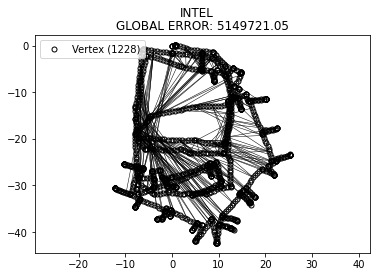

In [5]:
draw(posegraph_intel, "INTEL")

TIME COST: 
LINEARIZATION: 0.33032941818237305s,             
SOLVE LINEAR SYATEM: 0.0016853809356689453s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


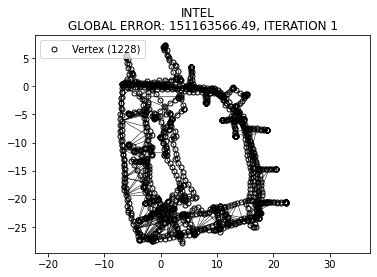

TIME COST: 
LINEARIZATION: 0.5303134918212891s,             
SOLVE LINEAR SYATEM: 0.0015683174133300781s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


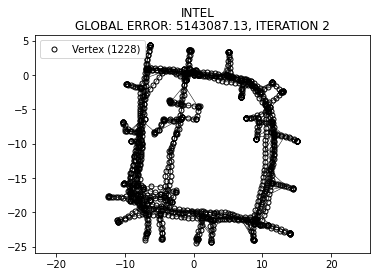

TIME COST: 
LINEARIZATION: 0.4089045524597168s,             
SOLVE LINEAR SYATEM: 0.0017344951629638672s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


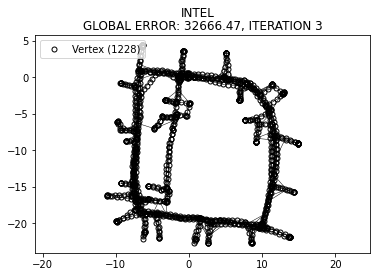

TIME COST: 
LINEARIZATION: 0.2653007507324219s,             
SOLVE LINEAR SYATEM: 0.001661062240600586s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


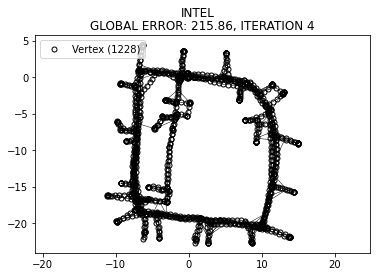

TIME COST: 
LINEARIZATION: 0.39107489585876465s,             
SOLVE LINEAR SYATEM: 0.0023484230041503906s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


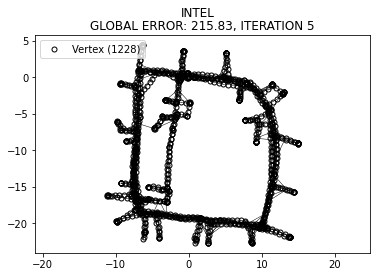

TIME COST: 
LINEARIZATION: 0.43012309074401855s,             
SOLVE LINEAR SYATEM: 0.0015172958374023438s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


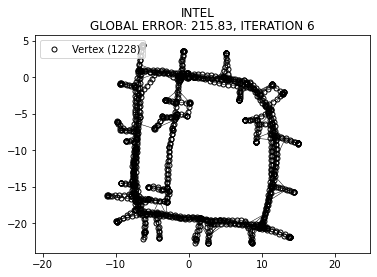

TIME COST: 
LINEARIZATION: 0.36836886405944824s,             
SOLVE LINEAR SYATEM: 0.0020482540130615234s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


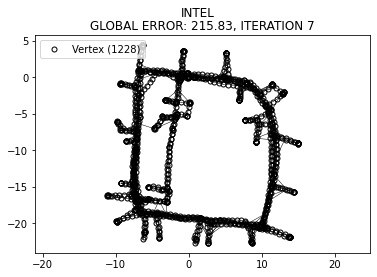

TIME COST: 
LINEARIZATION: 0.43872547149658203s,             
SOLVE LINEAR SYATEM: 0.0023195743560791016s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


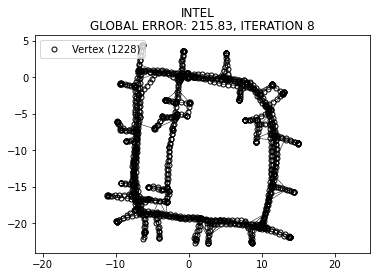

TIME COST: 
LINEARIZATION: 0.4863450527191162s,             
SOLVE LINEAR SYATEM: 0.010387897491455078s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


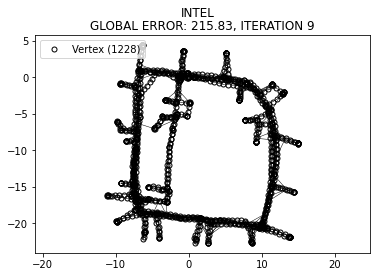

TIME COST: 
LINEARIZATION: 0.2658529281616211s,             
SOLVE LINEAR SYATEM: 0.0015578269958496094s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


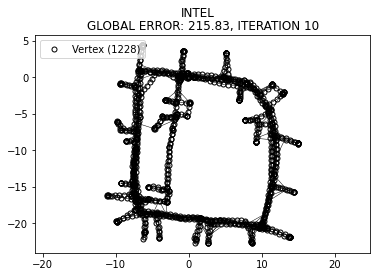

215.83334160352427

In [6]:
title = "INTEL"
posegraph_intel.graph_optimization(max_iter = 10, damp_factor=5, 
                                   solver="cholesky", callback = callback_function, epsilon = 0)
#draw(posegraph_intel, "INTEL")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


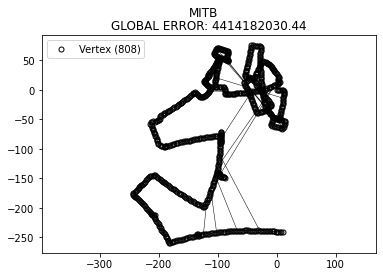

In [7]:
draw(posegraph_mitb, "MITB")

TIME COST: 
LINEARIZATION: 0.40375566482543945s,             
SOLVE LINEAR SYATEM: 0.0008754730224609375s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


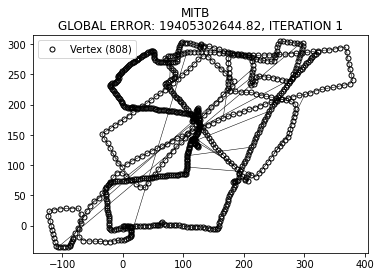

TIME COST: 
LINEARIZATION: 0.15735554695129395s,             
SOLVE LINEAR SYATEM: 0.0009596347808837891s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


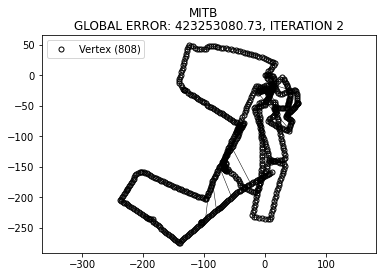

TIME COST: 
LINEARIZATION: 0.20997953414916992s,             
SOLVE LINEAR SYATEM: 0.002032756805419922s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


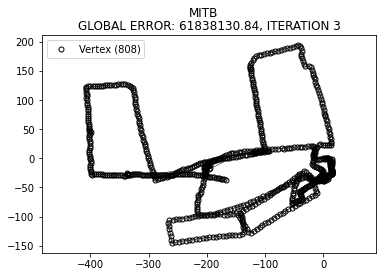

TIME COST: 
LINEARIZATION: 0.19623160362243652s,             
SOLVE LINEAR SYATEM: 0.0008656978607177734s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


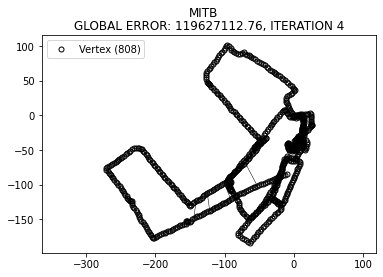

TIME COST: 
LINEARIZATION: 0.47660183906555176s,             
SOLVE LINEAR SYATEM: 0.0009090900421142578s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


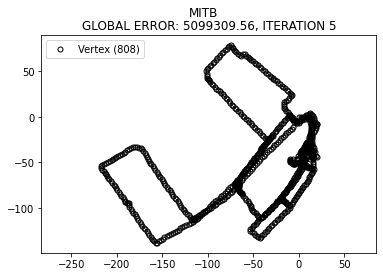

TIME COST: 
LINEARIZATION: 0.5279719829559326s,             
SOLVE LINEAR SYATEM: 0.0008721351623535156s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


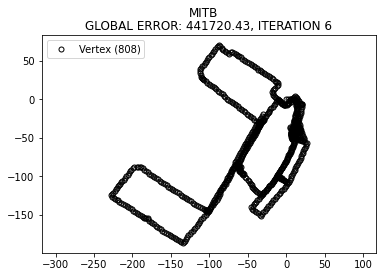

TIME COST: 
LINEARIZATION: 0.15834832191467285s,             
SOLVE LINEAR SYATEM: 0.0016031265258789062s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


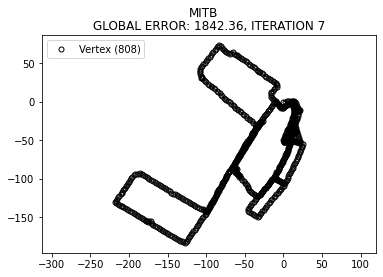

TIME COST: 
LINEARIZATION: 0.15726828575134277s,             
SOLVE LINEAR SYATEM: 0.0008780956268310547s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


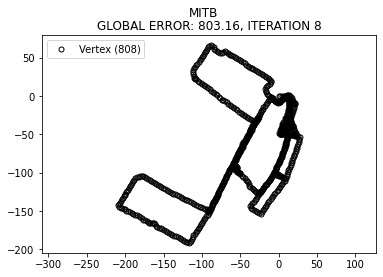

TIME COST: 
LINEARIZATION: 0.3735666275024414s,             
SOLVE LINEAR SYATEM: 0.004805564880371094s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


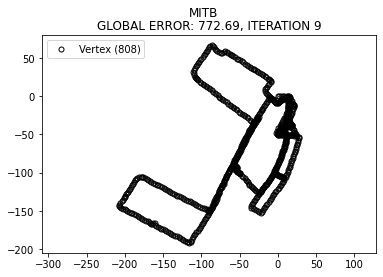

TIME COST: 
LINEARIZATION: 0.3716259002685547s,             
SOLVE LINEAR SYATEM: 0.0009233951568603516s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


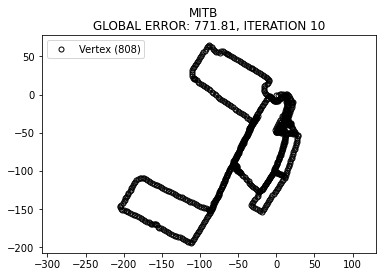

771.8074789576683

In [8]:
title = "MITB"
posegraph_mitb.graph_optimization(max_iter = 10, damp_factor=5, 
                                   solver="cholesky", callback = callback_function, epsilon = 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


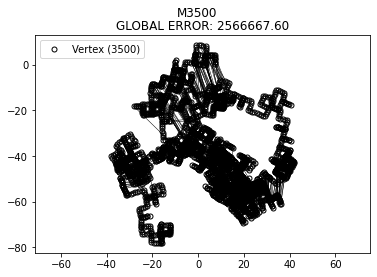

In [9]:
draw(posegraph_m3500, "M3500")

TIME COST: 
LINEARIZATION: 1.645157814025879s,             
SOLVE LINEAR SYATEM: 0.008877038955688477s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


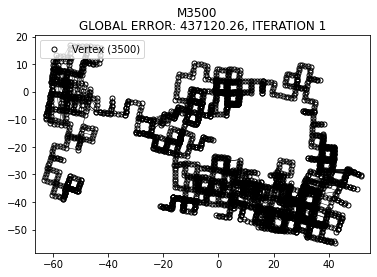

TIME COST: 
LINEARIZATION: 1.5181455612182617s,             
SOLVE LINEAR SYATEM: 0.009419918060302734s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


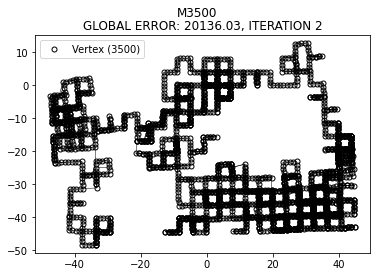

TIME COST: 
LINEARIZATION: 1.1700046062469482s,             
SOLVE LINEAR SYATEM: 0.00972747802734375s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


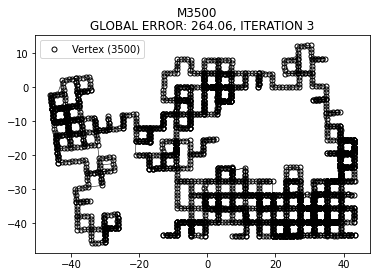

TIME COST: 
LINEARIZATION: 1.6853647232055664s,             
SOLVE LINEAR SYATEM: 0.012730121612548828s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


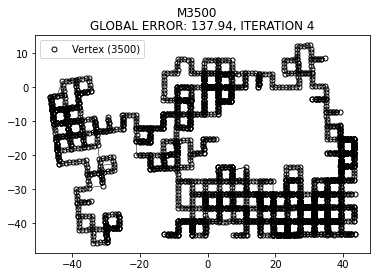

TIME COST: 
LINEARIZATION: 1.0777020454406738s,             
SOLVE LINEAR SYATEM: 0.009399652481079102s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


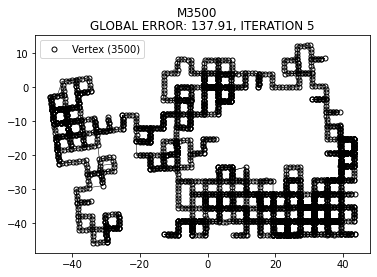

TIME COST: 
LINEARIZATION: 1.1709048748016357s,             
SOLVE LINEAR SYATEM: 0.009146690368652344s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


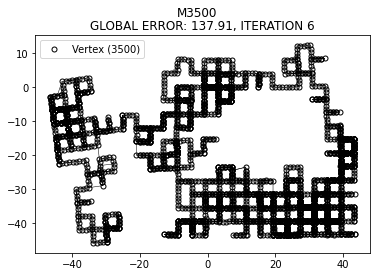

TIME COST: 
LINEARIZATION: 1.057011365890503s,             
SOLVE LINEAR SYATEM: 0.009090900421142578s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


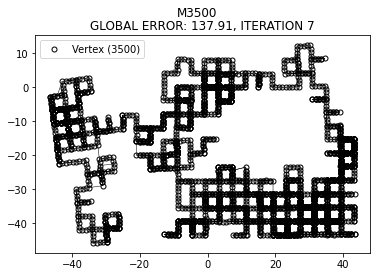

TIME COST: 
LINEARIZATION: 1.0635979175567627s,             
SOLVE LINEAR SYATEM: 0.00899648666381836s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


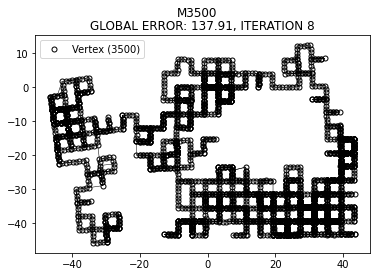

TIME COST: 
LINEARIZATION: 1.6186487674713135s,             
SOLVE LINEAR SYATEM: 0.009189605712890625s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


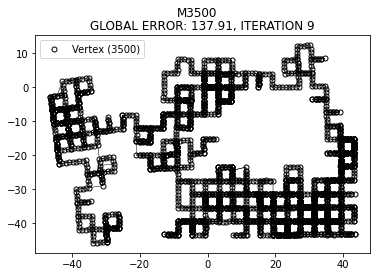

TIME COST: 
LINEARIZATION: 1.1498258113861084s,             
SOLVE LINEAR SYATEM: 0.009225130081176758s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


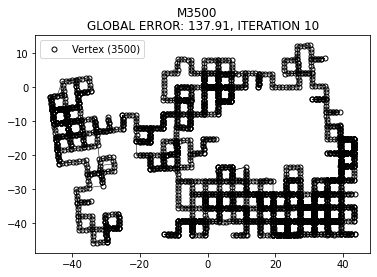

137.91296011458832

In [10]:
title = "M3500"
posegraph_m3500.graph_optimization(max_iter = 10, damp_factor=5, 
                                   solver="cholesky", callback = callback_function, epsilon = 0)

In [11]:
import pandas as pd
df = pd.DataFrame(data = time_cost, columns = ["name", "iteration", "linearization_time_cost", "solve_time_cost", "global_error"])
df["solver"] = "cholesky"
df.to_csv("./scripts/results/time_cost_g2o.csv", index = False)
print (df)

     name  iteration  linearization_time_cost  solve_time_cost  global_error  \
0   INTEL          0                 0.000000         0.000000  5.149721e+06   
1   INTEL          1                 0.330329         0.001685  1.511636e+08   
2   INTEL          2                 0.530313         0.001568  5.143087e+06   
3   INTEL          3                 0.408905         0.001734  3.266647e+04   
4   INTEL          4                 0.265301         0.001661  2.158643e+02   
5   INTEL          5                 0.391075         0.002348  2.158333e+02   
6   INTEL          6                 0.430123         0.001517  2.158333e+02   
7   INTEL          7                 0.368369         0.002048  2.158334e+02   
8   INTEL          8                 0.438725         0.002320  2.158335e+02   
9   INTEL          9                 0.486345         0.010388  2.158333e+02   
10  INTEL         10                 0.265853         0.001558  2.158333e+02   
11   MITB          0                 0.0

In [12]:
df = pd.read_csv("./scripts/results/time_cost_g2o.csv")
print (df)

     name  iteration  linearization_time_cost  solve_time_cost  global_error  \
0   INTEL          0                 0.000000         0.000000  5.149721e+06   
1   INTEL          1                 0.330329         0.001685  1.511636e+08   
2   INTEL          2                 0.530313         0.001568  5.143087e+06   
3   INTEL          3                 0.408905         0.001734  3.266647e+04   
4   INTEL          4                 0.265301         0.001661  2.158643e+02   
5   INTEL          5                 0.391075         0.002348  2.158333e+02   
6   INTEL          6                 0.430123         0.001517  2.158333e+02   
7   INTEL          7                 0.368369         0.002048  2.158334e+02   
8   INTEL          8                 0.438725         0.002320  2.158335e+02   
9   INTEL          9                 0.486345         0.010388  2.158333e+02   
10  INTEL         10                 0.265853         0.001558  2.158333e+02   
11   MITB          0                 0.0